Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


              c            t        medium     mode   zdr      sd
  Obj:     0.000000      3.50000       air             1      1.0000
45345:     0.026911      2.30000     N-BK7             1      2.8125
    2:    -0.038052      1.00000     N-SF5             1      1.0000
    3:    -0.013075     0.300000       air             1      2.8125
    4:     0.019543     0.800000    N-SF10             1      2.8125
    5:     0.189036      3.00000   N-BAF10             1      1.0000
32299:    -0.115875      6.31700       air             1      2.8125
    7:     0.003599     0.600000    N-SF10             1      2.8125
    8:     0.137931      2.70000    N-SSK8             1      1.0000
32301:    -0.125786      24.6080       air             1      2.8125
  Img:     0.000000      0.00000                       1      1.0000
None
root
├── Object
├── CE1
├── CE2
├── CE3
└── Image
None


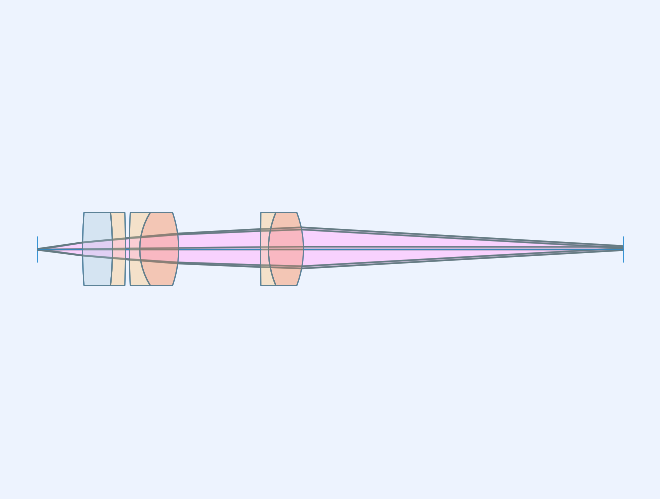

In [1]:
%matplotlib inline

from rayoptics.environment import *

# Create a new optical model
opm = OpticalModel()

sm = opm['seq_model']
osp = opm['optical_spec']
pm = opm['parax_model']
em = opm['ele_model']
pt = opm['part_tree']l

sm.gaps[0].thi = 4.5 #Working distance

sm.do_apertures = False # Disable automatic aperture calculation

opm.add_from_file("./lens-data/CODV_45345.seq", t=0.3) #6.25mm Dia. x 60mm FL, MgF2 Coated, Achromatic Doublet Lens

opm.add_from_file("./lens-data/CODV_32299.seq", t=6.317) #6.25mm Dia. x 12.5mm FL, MgF2 Coated, Achromatic Doublet Lens

opm.add_from_file("./lens-data/CODV_32301.seq", t=24.608) #6.25mm Dia. x 15mm FL, MgF2 Coated, Achromatic Doublet Lens


ce1 = pt.obj_by_name('CE1')
ce2 = pt.obj_by_name('CE2')
ce3 = pt.obj_by_name('CE3')

opm.flip(ce2)
opm.flip(ce3)

opm.update_model()

# Visualize the complete system
layout_plt = plt.figure(FigureClass=InteractiveLayout, opt_model=opm,
                        do_draw_rays=True, do_paraxial_layout=False).plot()